# Case Study 6 (Linear Regression)

##### Import libraries

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error

##### Download data and load data|

In [2]:
url = 'https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv'
# res = requests.get(url, allow_redirects=True)
# with open('insurance.csv','wb') as file:
#     file.write(res.content)
insuranceData = pd.read_csv(url)

##### Find the strongest correlation between the features

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    2  33.770         1       0       2   1725.55230
2   28    2  33.000         3       0       2   4449.46200
3   33    2  22.705         0       0       1  21984.47061
4   32    2  28.880         0       0       1   3866.85520


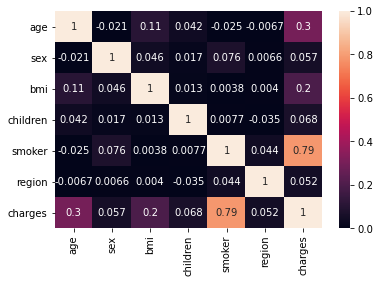

In [3]:
print(insuranceData.head(5))
corr_matrix = insuranceData.corr()
heatmap = sb.heatmap(insuranceData.corr(), vmin=0, vmax=1, annot=True)

### 1. Train a model to determine the amount of charges based on your choices of features

###### Split data for training

In [4]:
x = insuranceData[["age","bmi","smoker"]]
y = insuranceData["charges"]
xTrain, xTest, yTrain, yTest=train_test_split(x,y, test_size=0.2)

##### Train data using SKLearn LinearRegression

In [5]:
regressionMultivariate= LinearRegression().fit(xTrain,yTrain)

##### Testing model

In [6]:
testingMultivariate = regressionMultivariate.predict(xTest)

for i in range(len(xTest)):
  print(xTest.values[i], testingMultivariate[i])

MAE = mean_absolute_error(yTest,  testingMultivariate)
MSE = mean_squared_error(yTest, testingMultivariate)

print("Y intercept: ",regressionMultivariate.intercept_)
print("Slope: ", regressionMultivariate.coef_)
print("R2 Score: ", r2_score(yTest,testingMultivariate))
print(" MAE : ", MAE)
print(" MSE : ", MSE)

[34.   26.73  0.  ] 5783.059115444525
[28.  25.8  0. ] 3951.3993759700697
[54.  46.7  0. ] 17004.899217532224
[56.    33.725  0.   ] 13586.398109557726
[25.   33.99  0.  ] 5660.444586240603
[31.  23.6  0. ] 4058.992147126053
[64.    26.885  1.   ] 37609.45815272999
[31.   29.81  1.  ] 29973.688412109495
[39.  28.3  1. ] 31581.88563030867
[48.   28.88  0.  ] 10050.866271664807
[49.   30.78  0.  ] 10885.363809366183
[19.   17.48  0.  ] -896.2935757088308
[18.   21.66  1.  ] 24144.47895164244
[19.  28.4  0. ] 2415.5072184777364
[59.   31.79  0.  ] 13774.359672880324
[19.   44.88  1.  ] 31444.87327799378
[30.  24.4  1. ] 28074.683476276714
[27.   31.13  1.  ] 29340.942133478344
[45.  28.6  0. ] 9191.142917213703
[49.  27.1  0. ] 9769.299072863752
[42.   26.18  0.  ] 7682.403656209557
[59.   25.46  0.  ] 11854.607014711735
[61.    23.655  0.   ] 11823.726316175329
[48.   40.15  0.  ] 13468.814527203507
[50.  32.3  1. ] 35635.95255402083
[40.   24.97  0.  ] 6798.899794812587
[40.  19.8  1. ]

### 2. Using the same set of features used in number 1, perform normalisation to all the features and then train a model to determine the amount of charges. 

##### Create cost function to predict the error

In [7]:
def costFunction(x, y, theta):
    h = np.dot(x, theta) - y
    J = np.dot(h, h) / (2 * x.shape[0])
    return J

##### Create gradient descent function for the linear regression

In [8]:
def gradientDescent(x, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = (theta - (alpha / x.shape[0]) * np.dot(x.T, (np.dot(x, theta) - y)))   
        J_history[i] = costFunction(x, y, theta)
    return theta, J_history

##### Create normalization function

In [9]:
def featureNormalisation(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x)
    xNorm = (x - mu) / sigma
    return xNorm, mu, sigma

##### Create plotting function

In [10]:
def plotCost():
    plt.figure()
    plt.plot(np.arange(num_iters), J_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    plt.show()

[12610.71780498  3448.92681618  1935.64227648  9122.64565127]


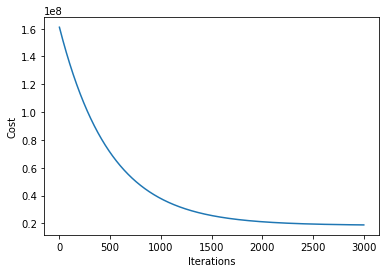

In [11]:
x = insuranceData[["age","bmi","smoker"]]
y = insuranceData["charges"]
xTrain, mu, sigma = featureNormalisation(x)
xTrain = np.hstack((np.ones((xTrain.shape[0], 1)), xTrain))
theta = np.zeros(4)
alpha = 0.001
num_iters = 3000

theta, J_history = gradientDescent(xTrain, y, theta, alpha, num_iters)
print(theta)
plotCost()


In [12]:
age = [34, 29, 25, 30]
bmi = [26.73, 37.29, 23.465, 37.8]
smoker = [0, 0, 0, 1]

charges = np.zeros(4)

for i in range(len(age)):
    age[i] = (age[i] - mu[0]) / sigma[0]
    bmi[i] = (bmi[i] - mu[1]) / sigma[1]
    smoker[i] = (smoker[i] - mu[2]) / sigma[2]
    charges[i] = theta[0] + (theta[1] * age[i]) + (theta[2] * bmi[i]) + (theta[3] * smoker[i])
    print("Charges for person ", i , "is ", charges[i])


Charges for person  0 is  5453.657412068503
Charges for person  1 is  7578.950851457023
Charges for person  2 is  2206.808041024533
Charges for person  3 is  30592.829189710097


### 3. See if there is any significant differences between those to models.

So, there are no siginificant differences between those to models in term on predicting the charges. For example, we can see where age, bmi, and smoker are respectively 34, 26.73, 0. Using SkLearn without normalization, the charges that we will get is 5783.059115444525, on the other hand, using numpy and normalization, the charges will be 5453.657412068503. 